In [ ]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


**Barkın Köroğlu - 18070001047**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# load the customer data into a DataFrame
customer_df = pd.read_csv('flo_data_20k.csv')

# Check the first 5 rows
customer_df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]


In [ ]:
# Summarize the data
print(customer_df.describe())

# unique values
for column in customer_df.columns:
    unique_values = customer_df[column].unique()
    unique_count = len(unique_values)
    print(f"Column name: {column}")
    print(f"Number of unique values: {unique_count}")
    print(f"Unique values: {unique_values}")
    print(f"{customer_df[column].dtype}\n")

       order_num_total_ever_online  order_num_total_ever_offline  \
count                 19945.000000                  19945.000000   
mean                      3.110855                      1.913913   
std                       4.225647                      2.062880   
min                       1.000000                      1.000000   
25%                       1.000000                      1.000000   
50%                       2.000000                      1.000000   
75%                       4.000000                      2.000000   
max                     200.000000                    109.000000   

       customer_value_total_ever_offline  customer_value_total_ever_online  
count                       19945.000000                      19945.000000  
mean                          253.922597                        497.321690  
std                           301.532853                        832.601886  
min                            10.000000                         12.990000  
25

In [ ]:
#check nulls
customer_df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [ ]:
import datetime as dt

#We are collecting the total amount paid by the user and the number of orders in separate columns.
customer_df["Total_Price"] = customer_df["customer_value_total_ever_offline"] + customer_df["customer_value_total_ever_online"]
customer_df["Total_Order_Num"] = customer_df["order_num_total_ever_offline"] + customer_df["order_num_total_ever_online"]

date_convert =  customer_df.columns[customer_df.columns.str.contains("date")]
customer_df[date_convert] = customer_df[date_convert].apply(pd.to_datetime)


date_convert = ["first_order_date", "last_order_date", "last_order_date_online", "last_order_date_offline" ]
customer_df[date_convert] = customer_df[date_convert].apply(pd.to_datetime)

# Converting the above mentioned column types from object to datetime format
customer_df["last_order_date"].max()

#The last order date in the database is 2021-05-30, so I updated the 'today' date to June 1, 2021.
today_date = dt.datetime(2021, 6, 1)


temp_df = pd.DataFrame()
temp_df["customer_id"] = customer_df["master_id"]

# We will look at 3 criteria for K-means clustering.
temp_df["LastOrderDate"] = (today_date - customer_df["last_order_date"]).astype('timedelta64[D]')
temp_df["TotalOrder"] = customer_df["Total_Order_Num"]
temp_df["TotalPrice"] = customer_df["Total_Price"]

temp_df.head()

,customer_id,LastOrderDate,TotalOrder,TotalPrice
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95.0,5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105.0,21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,186.0,5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,135.0,2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86.0,2.0,209.98


In [ ]:
relevant_cols = ["LastOrderDate","TotalOrder","TotalPrice"]

kmeans_df = temp_df[relevant_cols]

In [ ]:
#normalize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(kmeans_df)

scaled_data = scaler.transform(kmeans_df)
scaled_data

array([[-0.38205762, -0.00522249,  0.21010718],
       [-0.2852321 ,  3.36846288,  1.4097993 ],
       [ 0.49905459, -0.00522249, -0.18531164],
       ...,
       [-1.22443962, -0.42693316, -0.1321275 ],
       [-0.25618445,  0.20563285,  0.28873304],
       [ 2.1838186 , -0.6377885 , -0.54644334]])

In [ ]:
#creates for each value of K the corresponding KMeans model and saves its inertia along with the actual K value.
def find_best_clusters(df, maximum_K):
    
    clusters_centers = []
    k_values = []
    
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
        
    
    return clusters_centers, k_values

In [ ]:
#uses those inertias and K values to generate the final Elbow plot.
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

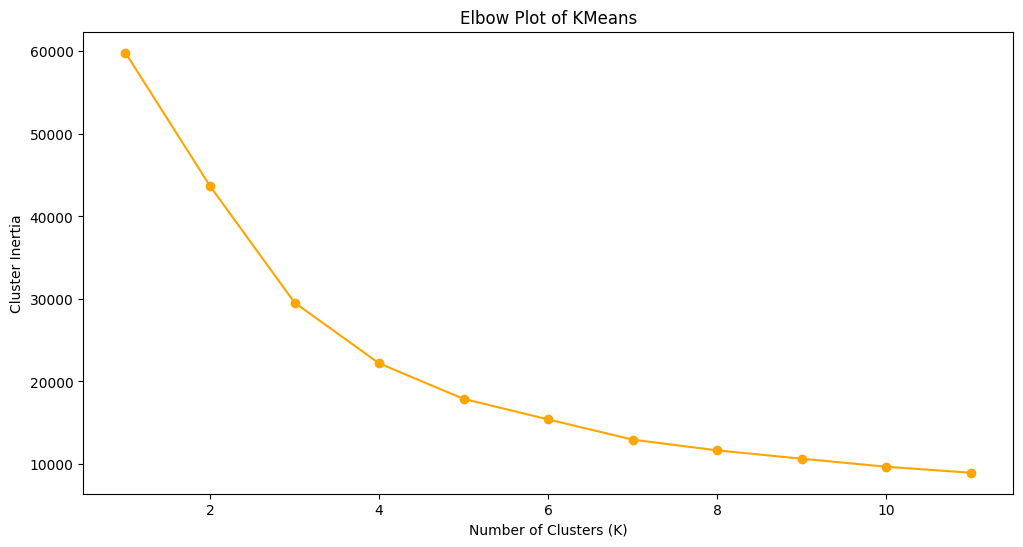

In [ ]:
#find the optimal number of K using elbow method
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

generate_elbow_plot(clusters_centers, k_values)

**If we look at it from a breaking point perspective, I have chosen the number of clusters as 5.**

In [ ]:
#drop the inertia is minimal after K=5 hence 5 can be considered as the optimal number of clusters.
#create the model
kmeans_model = KMeans(n_clusters = 5)

kmeans_model.fit(scaled_data)

#add clusters to df
customer_df["clusters"] = kmeans_model.labels_
temp_df["clusters"] = kmeans_model.labels_

temp_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,customer_id,LastOrderDate,TotalOrder,TotalPrice,clusters
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95.0,5.0,939.37,1
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105.0,21.0,2013.55,3
2,69b69676-1a40-11ea-941b-000d3a38a36f,186.0,5.0,585.32,0
3,1854e56c-491f-11eb-806e-000d3a38a36f,135.0,2.0,121.97,1
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86.0,2.0,209.98,1


Text(0, 0.5, 'TotalOrder')

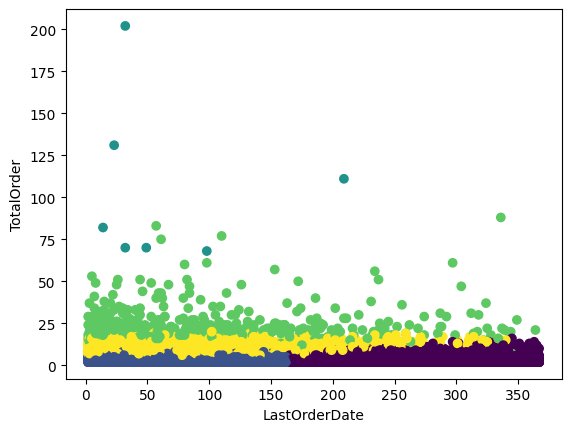

In [ ]:
#plot clusters
plt.scatter(temp_df["LastOrderDate"], 
            temp_df["TotalOrder"], 
            c = temp_df["clusters"])
plt.xlabel("LastOrderDate")
plt.ylabel("TotalOrder")

I have classified customers into 5 different types based on their behavior.

**NEW CUSTOMER**: A customer who has recently registered and has not made any or few orders.

**SLEEPING CUSTOMER**: A customer who has not made any orders for a long time.

**INTERMEDIATE CUSTOMER**: A customer who makes average purchases.

**LOYAL CUSTOMER**: A customer who makes above-average purchases.

**SUPER CUSTOMER**: A customer who makes a high volume of purchases.

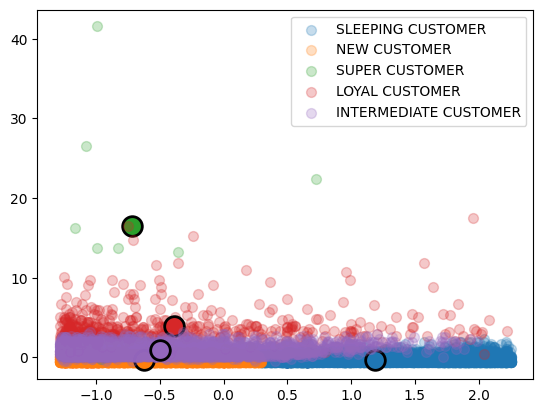

In [ ]:
import matplotlib.cm as cm
from itertools import cycle

X = scaled_data
colors = cycle(cm.tab10.colors)
y_kmeans = kmeans_model.predict(X)
centers = kmeans_model.cluster_centers_

plt.figure()
labels = {0: "SLEEPING CUSTOMER", 1: "NEW CUSTOMER", 2: "SUPER CUSTOMER", 3: "LOYAL CUSTOMER", 4: "INTERMEDIATE CUSTOMER"}
for i in range(5):
    # plot one cluster for each iteration
    color = next(colors)
    # find indeces corresponding to cluser i
    idx = y_kmeans == i
    # plot cluster
    plt.scatter(X[idx, 0], X[idx, 1], color=color, s=50, label=labels[i], alpha=0.25)
    # plot center
    plt.scatter(centers[i, 0], centers[i, 1], edgecolors="k", linewidth=2, color=color, s=200, alpha=1)
plt.legend()

In [ ]:
replacement_dictionary = {0: "SLEEPING CUSTOMER",
                          1: "NEW CUSTOMER",
                          2: "SUPER CUSTOMER", 
                          3: "LOYAL CUSTOMER",
                          4: "INTERMEDIATE CUSTOMER",
                          }
customer_df['clusters'] = customer_df['clusters'].replace(replacement_dictionary)
customer_df

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,Total_Price,Total_Order_Num,clusters
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],939.37,5.0,NEW CUSTOMER
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",2013.55,21.0,LOYAL CUSTOMER
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",585.32,5.0,SLEEPING CUSTOMER
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",121.97,2.0,NEW CUSTOMER
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],209.98,2.0,NEW CUSTOMER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,Android App,Offline,2019-09-21,2020-07-05,2020-06-05,2020-07-05,1.0,2.0,289.98,111.98,"[ERKEK, AKTIFSPOR]",401.96,3.0,SLEEPING CUSTOMER
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f,Desktop,Desktop,2020-03-01,2020-12-22,2020-12-22,2020-03-01,1.0,1.0,150.48,239.99,[AKTIFSPOR],390.47,2.0,NEW CUSTOMER
19942,8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,Ios App,Ios App,2019-09-11,2021-05-24,2021-05-24,2019-09-11,2.0,1.0,139.98,492.96,[AKTIFSPOR],632.94,3.0,NEW CUSTOMER
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f,Android App,Android App,2019-03-27,2021-02-13,2021-02-13,2021-01-08,1.0,5.0,711.79,297.98,"[ERKEK, AKTIFSPOR]",1009.77,6.0,NEW CUSTOMER


In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
dataset = kmeans_df

Text(0.5, 0, 'n_components')

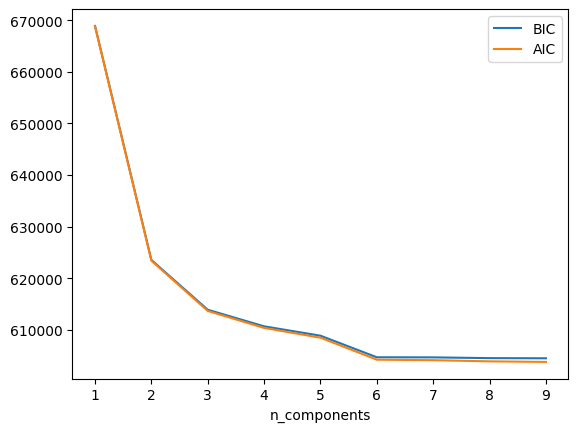

In [ ]:
#Optimal Clusters
n_components = np.arange(1, 10)
models = [GaussianMixture(n,
                          random_state = 1502).fit(dataset)
          for n in n_components]

plt.plot(n_components, [m.bic(dataset) for m in models], label='BIC')
plt.plot(n_components, [m.aic(dataset) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

**If we look at the breaking point of both, I have chosen the number of clusters as 5.**

In [ ]:
#Gaussian Mixture Model
model = GaussianMixture(n_components = 5,
                        random_state=1502).fit(dataset)

We are calculating the average price a customer pays in a single purchase. (In section 3, it was mentioned that the average is over 250 TL.)

In [ ]:
customer_df["Average price spend"] =  customer_df["Total_Price"] / customer_df["Total_Order_Num"]

3-)  FLO includes a new women's shoe brand. The product prices of the brand it includes are above the general customer preferences. For this reason, customers in the profile who will be interested in the promotion of the brand and product sales are requested to be contacted privately. It is assumed that these customers will be loyal, on average over 250 TL and those who shop in the women's category. Save the id numbers of the customers to the csv file as new_brand_target_customer_id.csv

In [ ]:
target_cluster = customer_df[customer_df["clusters"].isin(["LOYAL CUSTOMER","SUPER CUSTOMER"])]["master_id"] 
target_customer = customer_df[(customer_df["master_id"].isin(target_cluster)) & (customer_df["Average price spend"] >250) & (customer_df["interested_in_categories_12"].str.contains("KADIN"))]["master_id"] 
target_customer.to_csv("new_brand_target_customer_id.csv", index=False)
target_customer.shape
target_customer.head()

1078    df760a84-ab25-11e9-a2fc-000d3a38a36f
1134    fdd08240-244a-11ea-a30f-000d3a38a36f
2002    f1e095a6-637e-11ea-a6dc-000d3a38a36f
2401    1e4fcad2-a57d-11e9-a2fc-000d3a38a36f
4016    b95511d4-aa3e-11e9-a2fc-000d3a38a36f
Name: master_id, dtype: object

4-) Up to 40% discount is planned for Men's and Children's products. We want to specifically target customers who are good customers in the past who are interested in categories related to this discount, but have not shopped for a long time and new customers. Save the ids of the customers in the appropriate profile to the csv file as discount_target_customer_ids.csv.

In [ ]:
target_cluster = customer_df[customer_df["clusters"].isin(["NEW CUSTOMER","SLEEPING CUSTOMER"])]["master_id"]
target_customer = customer_df[(customer_df["master_id"].isin(target_cluster)) & ((customer_df["interested_in_categories_12"].str.contains("ERKEK"))|(customer_df["interested_in_categories_12"].str.contains("COCUK")))]["master_id"]
target_customer.to_csv("discount_target_customer_ids.csv", index=False)
target_customer.shape
target_customer.head()


2     69b69676-1a40-11ea-941b-000d3a38a36f
3     1854e56c-491f-11eb-806e-000d3a38a36f
7     3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f
8     cfbda69e-5b4f-11ea-aca7-000d3a38a36f
10    ae608ece-c9d8-11ea-a31e-000d3a38a36f
Name: master_id, dtype: object